In this notebook, we are going to 


# Outline 
* [Brief Description of the Data Set and a Summary of its Attributes](#1)
* [Data Exploration](#2)
 * [Summary Statistics](#21)
 * [Data Visualization](#22)
* [Data Preprocessing](#3)
 * [Missing Values](#31)
 * [Outliers](#32)
 * [Feature Engineering and Feature Extraction](#33)
* [Conclusion](#4)

## Data Exploration <a anchor = "anchor" id = 2></a>
The goal of data exploration to understand the data set and summarize their characteristics. We will understand the data through two techniques:

### Summary Statistics <a anchor = "anchor" id = 21></a>
Summary statistics are quantities, such as the mean and standard deviation, that capture various characteristics of a potentially large set of values with a single number or a small set of numbers.

In [4]:
import datetime
from dateutil.relativedelta import relativedelta

a = '2014-05-06 12:00:56'
b = '2013-03-06 16:08:22'

start = datetime.datetime.strptime(a, '%Y-%m-%d %H:%M:%S')
ends = datetime.datetime.strptime(b, '%Y-%m-%d %H:%M:%S')

diff = relativedelta(start, ends)

diff

relativedelta(years=+1, months=+1, days=+29, hours=+19, minutes=+52, seconds=+34)

In [5]:
#import the important packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
data = pd.read_excel("Dataset_DS_Internship .xlsx")

In [7]:
#Explore the dataset by figuring the first 5 samples
data.head()

,Out_Date,Out_Day,Out_Weekday,Out_Month,out_Year,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,...,Return_Airline,Out_Travel_Time,Return_Travel_Time,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort
0,5/1/2021,5,Tuesday,January,2021,19:50–21:45,BOM Chhatrapati,SpiceJet,7/1/2021,7,...,SpiceJet,1h 55m,1h 35m,direct,direct,0,0,7798,20220104-1033,Best
1,5/1/2021,5,Tuesday,January,2021,21:50–23:30,BOM Chhatrapati,IndiGo,7/1/2021,7,...,IndiGo,1h 40m,1h 55m,direct,direct,0,0,7798,20220104-1033,Best
2,5/1/2021,5,Tuesday,January,2021,10:45–12:25,BOM Chhatrapati,IndiGo,7/1/2021,7,...,IndiGo,1h 40m,1h 55m,direct,direct,0,0,7798,20220104-1033,Best
3,5/1/2021,5,Tuesday,January,2021,05:55–08:00,BOM Chhatrapati,SpiceJet,7/1/2021,7,...,SpiceJet,2h 05m,1h 35m,direct,direct,0,0,7798,20220104-1033,Best
4,5/1/2021,5,Tuesday,January,2021,19:50–21:45,BOM Chhatrapati,SpiceJet,7/1/2021,7,...,SpiceJet,1h 55m,2h 00m,direct,direct,0,0,7798,20220104-1033,Best


In [8]:
#Explore the dataset by figuring the last 5 samples
data.tail()

,Out_Date,Out_Day,Out_Weekday,Out_Month,out_Year,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,...,Return_Airline,Out_Travel_Time,Return_Travel_Time,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort
4282,2021-01-10 00:00:00,10,Sunday,January,2021,07:55–09:05,VGA Vijayawada,IndiGo,2021-02-10 00:00:00,10,...,IndiGo,1h 10m,1h 05m,direct,direct,0,0,5365,20220106-1322,fast
4283,2021-01-10 00:00:00,10,Sunday,January,2021,18:15–19:20,VGA Vijayawada,IndiGo,2021-02-10 00:00:00,10,...,IndiGo,1h 05m,1h 10m,direct,direct,0,0,5365,20220106-1322,fast
4284,2021-01-10 00:00:00,10,Sunday,January,2021,07:55–09:05,VGA Vijayawada,IndiGo,2021-02-10 00:00:00,10,...,IndiGo,1h 10m,1h 10m,direct,direct,0,0,5365,20220106-1322,fast
4285,2021-01-10 00:00:00,10,Sunday,January,2021,12:20–13:30,VGA Vijayawada,IndiGo,2021-02-10 00:00:00,10,...,IndiGo,1h 10m,1h 10m,direct,direct,0,0,5365,20220106-1322,fast
4286,2021-01-10 00:00:00,10,Sunday,January,2021,21:30–22:50,VGA Vijayawada,IndiGo,2021-02-10 00:00:00,10,...,IndiGo,1h 20m,1h 00m,direct,direct,0,0,5365,20220106-1322,fast


In [9]:
#Explore the columns of the dataset
cols = data.columns
cols

Index(['Out_Date', 'Out_Day', 'Out_Weekday', 'Out_Month', 'out_Year',
       'Out_Time', 'Out_Cities', 'Out_Airline', 'Return_Date', 'Return_Day',
       'Return_Weekday', 'Return_Month', 'Return_Year', 'Return_Time',
       'Return_Cities', 'Return_Airline', 'Out_Travel_Time',
       'Return_Travel_Time', 'Out_Journey_Type', 'Return_Journey_Type',
       'Out_Stop_Cities', 'Return_Stop_Cities', 'Price', 'timestamp', 'sort'],
      dtype='object')

In [10]:
#explore the shape of the dataset
data.shape

(4287, 25)

__Observation:__

- the dataset has 25 attributes
- the dataset has 4287 samples

In [11]:
#get some info about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Out_Date             4287 non-null   object
 1   Out_Day              4287 non-null   int64 
 2   Out_Weekday          4287 non-null   object
 3   Out_Month            4287 non-null   object
 4   out_Year             4287 non-null   int64 
 5   Out_Time             4287 non-null   object
 6   Out_Cities           4287 non-null   object
 7   Out_Airline          4287 non-null   object
 8   Return_Date          4287 non-null   object
 9   Return_Day           4287 non-null   int64 
 10  Return_Weekday       4287 non-null   object
 11  Return_Month         4287 non-null   object
 12  Return_Year          4287 non-null   int64 
 13  Return_Time          4287 non-null   object
 14  Return_Cities        4287 non-null   object
 15  Return_Airline       4287 non-null   object
 16  Out_Tr

__Get some summary statistics about the attributes using .describe() method__
- If an attribute is quantitative, it will display its mean, standard deviation and 
various quantiles (including minimum, median, and maximum) values. 
- If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values.

In [12]:
#get some summary statistics about the quantitive attributes using 
#If an attribute is quantitative, it will display its mean, standard deviation and 
#various quantiles (including minimum, median, and maximum) values. 
#If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values.
data.describe()

,Out_Day,out_Year,Return_Day,Return_Year,Price
count,4287.000000,4287.0,4287.000000,4287.0,4287.000000
mean,12.364124,2021.0,16.759739,2021.0,11461.501749
std,8.827329,0.0,9.713878,0.0,20195.443152
min,1.000000,2021.0,1.000000,2021.0,2835.000000
25%,6.000000,2021.0,9.000000,2021.0,5365.000000
50%,10.000000,2021.0,13.000000,2021.0,6862.000000
75%,19.000000,2021.0,28.000000,2021.0,7965.000000
max,31.000000,2021.0,31.000000,2021.0,189933.000000


In [13]:
data.describe(include = "all")

,Out_Date,Out_Day,Out_Weekday,Out_Month,out_Year,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,...,Return_Airline,Out_Travel_Time,Return_Travel_Time,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort
count,4287,4287.000000,4287,4287,4287.0,4287,4287,4287,4287,4287.000000,...,4287,4287,4287,4287,4287,4287.0,4287.0,4287.000000,4287,4287
unique,63,NaN,7,8,NaN,272,26,11,89,NaN,...,11,95,135,4,4,28.0,28.0,NaN,247,3
top,10/1/2021,NaN,Tuesday,January,NaN,23:35–00:45,BOM Chhatrapati,IndiGo,31/1/2021,NaN,...,IndiGo,2h 05m,2h 10m,direct,direct,0.0,0.0,NaN,20220106-1227,fast
freq,350,NaN,959,3504,NaN,249,1467,1836,464,NaN,...,1950,498,563,3703,3516,3703.0,3703.0,NaN,62,1460
mean,NaN,12.364124,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,16.759739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11461.501749,NaN,NaN
std,NaN,8.827329,NaN,NaN,0.0,NaN,NaN,NaN,NaN,9.713878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20195.443152,NaN,NaN
min,NaN,1.000000,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2835.000000,NaN,NaN
25%,NaN,6.000000,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5365.000000,NaN,NaN
50%,NaN,10.000000,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,13.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6862.000000,NaN,NaN
75%,NaN,19.000000,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,28.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7965.000000,NaN,NaN


__Observation:__

- The flights travels and back in 2021
- The average price is 11461.50
- There are no missing values 

In [14]:
#get the covariance between the quantitive attributes
print('Covariance:')
data.cov()

Covariance:


,Out_Day,out_Year,Return_Day,Return_Year,Price
Out_Day,77.921746,0.0,31.360487,0.0,-2.097011e+04
out_Year,0.000000,0.0,0.000000,0.0,0.000000e+00
Return_Day,31.360487,0.0,94.359433,0.0,-4.941282e+04
Return_Year,0.000000,0.0,0.000000,0.0,0.000000e+00
Price,-20970.107147,0.0,-49412.824125,0.0,4.078559e+08


In [15]:
#get the correlation between the quantitive attributes
print('Correlation:')
data.corr()

Correlation:


,Out_Day,out_Year,Return_Day,Return_Year,Price
Out_Day,1.00000,NaN,0.36573,NaN,-0.11763
out_Year,NaN,NaN,NaN,NaN,NaN
Return_Day,0.36573,NaN,1.00000,NaN,-0.25188
Return_Year,NaN,NaN,NaN,NaN,NaN
Price,-0.11763,NaN,-0.25188,NaN,1.00000


__Observation:__
- There is no strong correlation between the quantitive attributes

## Data Visualization  <a anchor = "anchor" id = 22></a>
Data visualization is the display of information in a graphic or tabular format. Successful visualization requires that the data (information) be converted into a visual format so that the characteristics of the data and the relationships among data items or attributes can be analyzed or reported.

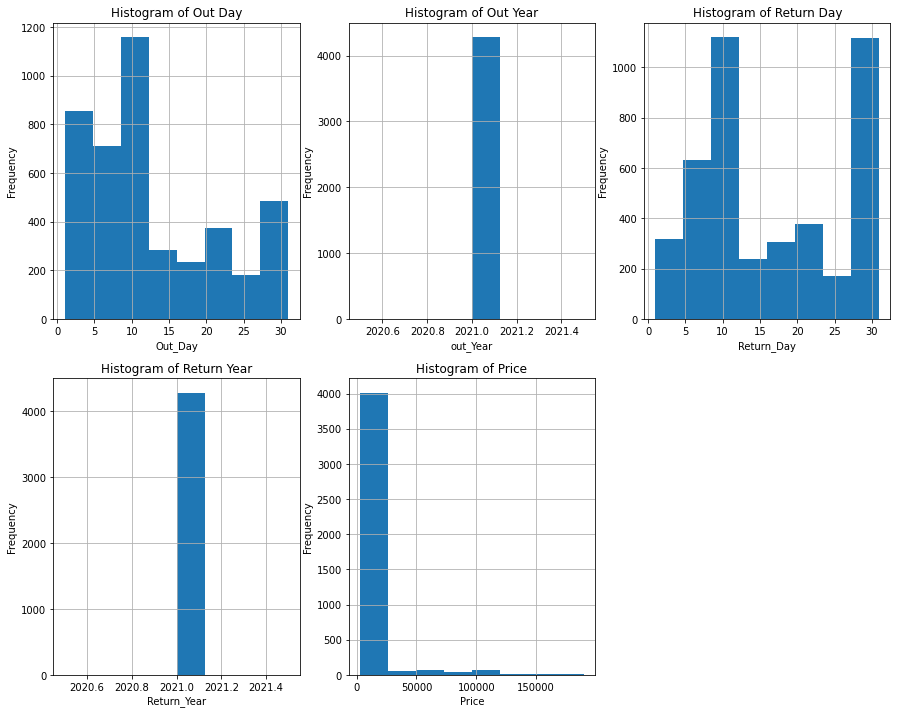

In [16]:
#plot histograms for all numerical attrubutes
from pandas.api.types import is_numeric_dtype
plt.figure(figsize = (15,12))
i = 1
for col in data.columns:
    if(is_numeric_dtype(data[col])):
        plt.subplot(2,3,i)
        data[col].hist(bins = 8)
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.title("Histogram of " + col.replace("_", " ").title())
        i +=1

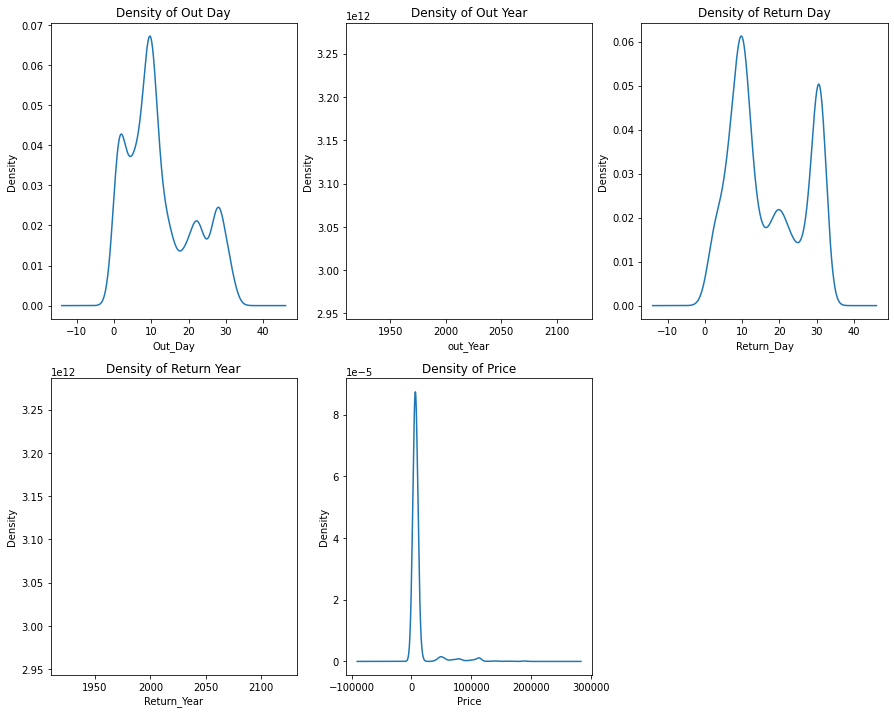

In [17]:
plt.figure(figsize = (15,12))
i = 1
for col in data.columns:
    if(is_numeric_dtype(data[col])):
        plt.subplot(2,3,i)
        data[col].plot.kde()
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.title("Density of " + col.replace("_", " ").title())
        i +=1

__Observation:__
- The attributes don't seem normally distributed 

In [18]:
num_cols = []
for col in data.columns:
    if(is_numeric_dtype(data[col])):
        num_cols.append(col)

In [19]:
num_cols

['Out_Day', 'out_Year', 'Return_Day', 'Return_Year', 'Price']

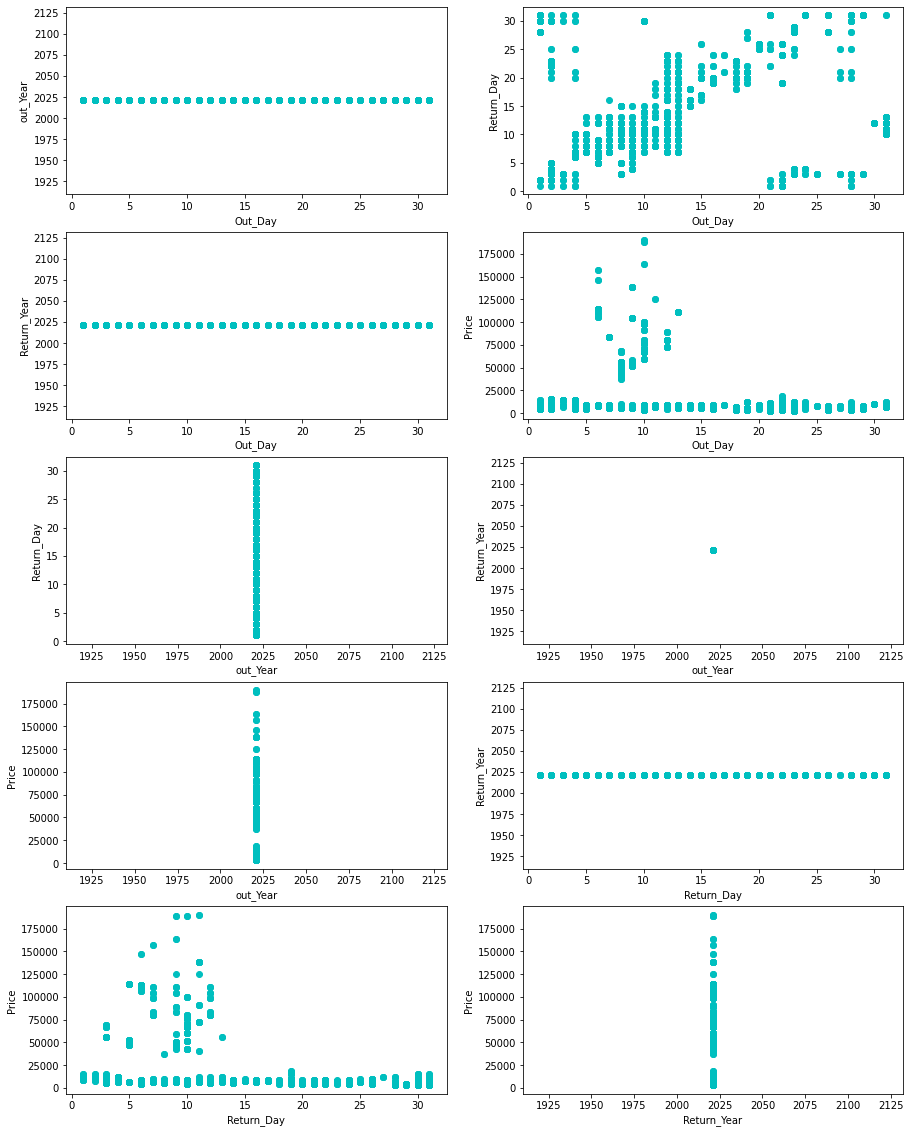

In [20]:
fig, axes = plt.subplots(5, 2, figsize=(15,20))
index = 0

for i in range(4):
    for j in range(i+1,5):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[num_cols[i]], data[num_cols[j]], color='c')
        axes[ax1][ax2].set_xlabel(num_cols[i])
        axes[ax1][ax2].set_ylabel(num_cols[j])
        index = index + 1

__Observation:__
- There is no relationship between any pair
- There is no relation ship between the return date __(Day, Month,Year)__ and the out date __(Day, Month,Year)__
- Based on that we can __remove__ the any time attribute about returning journey as it doesn't give us any informaton since our objective is to predict the optimal time with the minmum price for the tickey flight

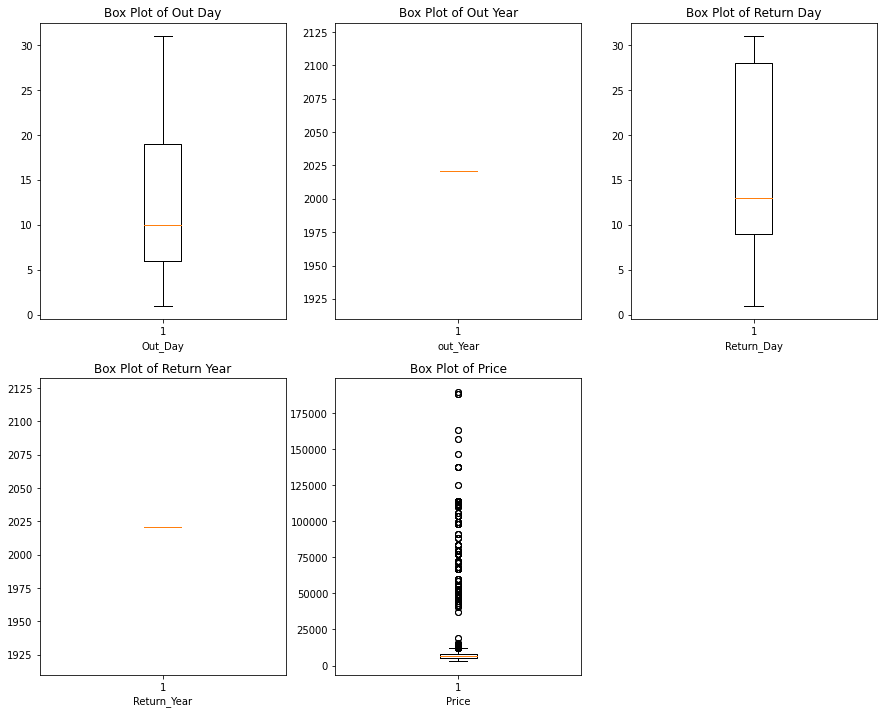

In [21]:
plt.figure(figsize = (15,12))
i = 1
for col in data.columns:
    if(is_numeric_dtype(data[col])):
        plt.subplot(2,3,i)
        plt.boxplot(data[col])
        plt.xlabel(col)
        plt.title("Box Plot of " + col.replace("_", " ").title())
        i +=1

__Observation:__

- We can see that there is outliers in the Price Attribute

## Data Preprocessing <a anchor = "anchor" id = 3></a>
Data preprocessing consists of a broad set of techniques for cleaning, selecting, and transforming data to improve data mining analysis. We trying to prepare the data so that we can fit it to our model properly

### Missing Values <a anchor = "anchor" id = 31></a>

In [22]:
#check the number of missing values for every attribute in the entire data set 
data.isnull().sum()

Out_Date               0
Out_Day                0
Out_Weekday            0
Out_Month              0
out_Year               0
Out_Time               0
Out_Cities             0
Out_Airline            0
Return_Date            0
Return_Day             0
Return_Weekday         0
Return_Month           0
Return_Year            0
Return_Time            0
Return_Cities          0
Return_Airline         0
Out_Travel_Time        0
Return_Travel_Time     0
Out_Journey_Type       0
Return_Journey_Type    0
Out_Stop_Cities        0
Return_Stop_Cities     0
Price                  0
timestamp              0
sort                   0
dtype: int64

__Observation:__

- There is no missing values for all the attributes we don't need to app data cleaning methods on the data set 

### Outliers <a anchor = "anchor" id = "32"></a>

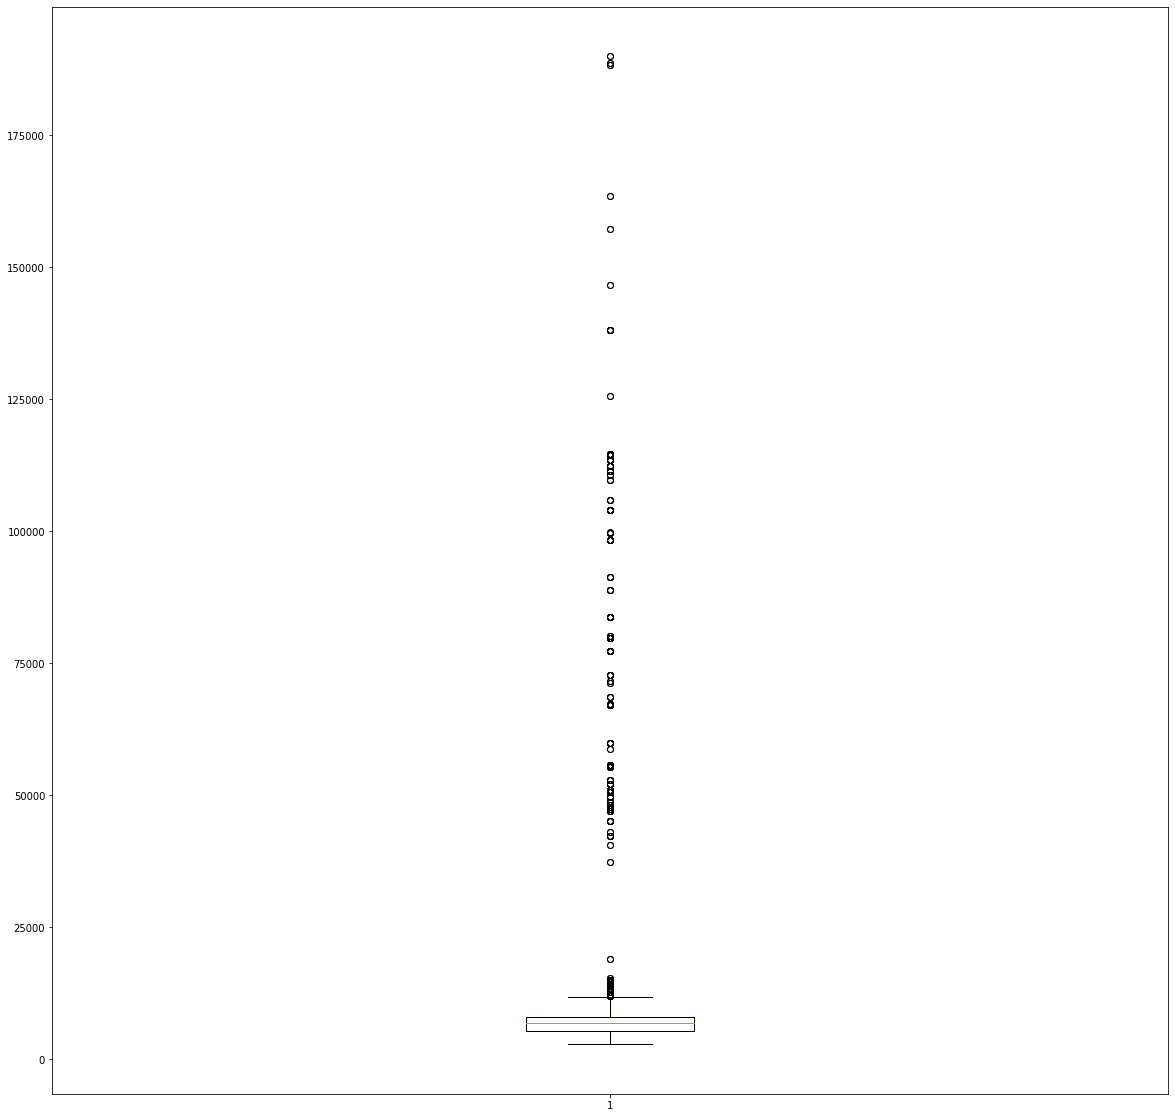

In [23]:
#lets visualize a box plot for the price attribute
plt.figure(figsize= (20,20))
plt.boxplot(data.Price);

<AxesSubplot:>

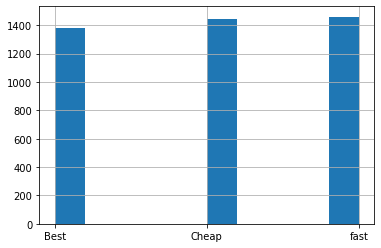

In [24]:
#lets see the histogram for the sort attribute
data["sort"].hist()

__Observation:__

- We can see that sort attribute consists of 3 classses Best, Cheap, fast 
- Each of them approximately has the same probability of occuring 
- But remember our objective is to get THE OPTIMAL TIME WITH THE MINIMUM PRICE regarding the quality of the flight 

### Feature Engineering and Feature Extraction <a anchor  ="anchor" id = "33"></a>

- Feature Engineering and Feature Extraction are transformation of raw data into features suitable for modeling

In [25]:
#remind ourselves with the data
data.head()

,Out_Date,Out_Day,Out_Weekday,Out_Month,out_Year,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,...,Return_Airline,Out_Travel_Time,Return_Travel_Time,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort
0,5/1/2021,5,Tuesday,January,2021,19:50–21:45,BOM Chhatrapati,SpiceJet,7/1/2021,7,...,SpiceJet,1h 55m,1h 35m,direct,direct,0,0,7798,20220104-1033,Best
1,5/1/2021,5,Tuesday,January,2021,21:50–23:30,BOM Chhatrapati,IndiGo,7/1/2021,7,...,IndiGo,1h 40m,1h 55m,direct,direct,0,0,7798,20220104-1033,Best
2,5/1/2021,5,Tuesday,January,2021,10:45–12:25,BOM Chhatrapati,IndiGo,7/1/2021,7,...,IndiGo,1h 40m,1h 55m,direct,direct,0,0,7798,20220104-1033,Best
3,5/1/2021,5,Tuesday,January,2021,05:55–08:00,BOM Chhatrapati,SpiceJet,7/1/2021,7,...,SpiceJet,2h 05m,1h 35m,direct,direct,0,0,7798,20220104-1033,Best
4,5/1/2021,5,Tuesday,January,2021,19:50–21:45,BOM Chhatrapati,SpiceJet,7/1/2021,7,...,SpiceJet,1h 55m,2h 00m,direct,direct,0,0,7798,20220104-1033,Best


In [26]:
#remind ourselves with the name of the columns
data.columns

Index(['Out_Date', 'Out_Day', 'Out_Weekday', 'Out_Month', 'out_Year',
       'Out_Time', 'Out_Cities', 'Out_Airline', 'Return_Date', 'Return_Day',
       'Return_Weekday', 'Return_Month', 'Return_Year', 'Return_Time',
       'Return_Cities', 'Return_Airline', 'Out_Travel_Time',
       'Return_Travel_Time', 'Out_Journey_Type', 'Return_Journey_Type',
       'Out_Stop_Cities', 'Return_Stop_Cities', 'Price', 'timestamp', 'sort'],
      dtype='object')

#### Clearn Cities Features and Remove Duplicates 

In [27]:
for i in range(data.shape[0]):
    idx_r = data["Return_Cities"][i].index(' ')
    idx_o = data["Out_Cities"][i].index(' ')
    
    if(idx_r  > 0):
        data["Return_Cities"][i] = data["Return_Cities"][i][idx_r+1: ]
        
    if(idx_o  > 0):
        data["Out_Cities"][i] = data["Out_Cities"][i][idx_o+1: ]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9624\2959550174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Return_Cities"][i] = data["Return_Cities"][i][idx_r+1: ]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9624\2959550174.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Out_Cities"][i] = data["Out_Cities"][i][idx_o+1: ]


In [28]:
data["Return_Cities"].unique()

array(['Sanganeer', 'Indira', 'Rajiv', 'HYD', 'Bengaluru', 'Lohegaon',
       'PNQ', 'DEL', 'Chennai', 'MAA', 'Chhatrapati', 'BOM', 'Dr.',
       'Indore', 'Netaji', 'CCU', 'NAG', 'Bhubaneswar', 'BBI', 'BLR',
       'Amausi', 'GOA'], dtype=object)

In [29]:
data["Out_Cities"].unique()

array(['Chhatrapati', 'BOM', 'Lohegaon', 'PNQ', 'Rajiv', 'Indira',
       'Vijayawada', 'GOA', 'GOI', 'Goa', 'Ahmedabad', 'Bengaluru', 'BLR',
       'Bhubaneswar', 'Bhopal', 'Netaji', 'NAG', 'Dr.', 'CCU', 'DEL',
       'Chandigarh', 'AMD', 'Sanganeer', 'JAI'], dtype=object)

In [30]:
data.replace({'AMD Ahmedabad': "AMD", 
              'Ahmedabad': "AMD", 
             'BBI Bhubaneswar':"BBI",
              'Bhubaneswar': "BBI",
             'BHO Bhopal':"BHO",
              "Bhopal": "BHO",
             'BLR Bengaluru': "BLR",
              'Bengaluru': "BLR",
             'BOM Chhatrapati': "BOM",
              "Chhatrapati": "BOM",
             'CCU Netaji': "CCU",
              "Netaji": "CCU",
              'DEL Indira': 'DEL',
              "Indira": "DEL",
             'GOI Goa': "GOI",
             "HYD Rajiv": "HYD",
              "Rajiv": "HYD",
             'IXC Chandigarh': 'IXC',
              "Chandigarh": "IXC",
             'JAI Sanganeer': "JAI",
              "Sanganeer": "JAI",
             "NAG Dr.": "NAG",
              'Dr.': "NAG",
              'PNQ Lohegaon':"PNQ",
              "Lohegaon": "PNQ",
             'VGA Vijayawada':"VGA",
              "Vijayawada": "VGA",
             'IDR Indore': "IDR",
             'LKO Amausi':"LKO",
              "Amausi": "LKO",
              'Goa': "GOI",
              "Indore": "IDR",
              "GOA": "GOI",
              "Chennai":"MAA",
             'MAA Chennai': "MAA",
             "AirAsia India": "AirAsia_India",
             "Qatar Airways": "Qatar_Airways",
             "Multiple Airlines":"Multiple_Airlines"}, inplace = True)

In [31]:
np.sort(data.Out_Cities.unique())

array(['AMD', 'BBI', 'BHO', 'BLR', 'BOM', 'CCU', 'DEL', 'GOI', 'HYD',
       'IXC', 'JAI', 'NAG', 'PNQ', 'VGA'], dtype=object)

In [32]:
np.sort(data.Return_Cities.unique())

array(['BBI', 'BLR', 'BOM', 'CCU', 'DEL', 'GOI', 'HYD', 'IDR', 'JAI',
       'LKO', 'MAA', 'NAG', 'PNQ'], dtype=object)

#### Getting the optimal time 

#### The steps to get the optimal time 
 1. Convert Out_Date and timestamp into datetime object 
 2. Drop Years from the two dates 
 3. Get the time difference 
 4. Construct the optimal time features

In [33]:
#Step 1: convertion to datetime object
data["timestamp"] = pd.to_datetime(data["timestamp"])
data["Out_Date"] = pd.to_datetime(data["Out_Date"])

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-pa

In [34]:
#check 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Out_Date             4287 non-null   datetime64[ns]
 1   Out_Day              4287 non-null   int64         
 2   Out_Weekday          4287 non-null   object        
 3   Out_Month            4287 non-null   object        
 4   out_Year             4287 non-null   int64         
 5   Out_Time             4287 non-null   object        
 6   Out_Cities           4287 non-null   object        
 7   Out_Airline          4287 non-null   object        
 8   Return_Date          4287 non-null   object        
 9   Return_Day           4287 non-null   int64         
 10  Return_Weekday       4287 non-null   object        
 11  Return_Month         4287 non-null   object        
 12  Return_Year          4287 non-null   int64         
 13  Return_Time          4287 non-nul

In [35]:
data.head()

,Out_Date,Out_Day,Out_Weekday,Out_Month,out_Year,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,...,Return_Airline,Out_Travel_Time,Return_Travel_Time,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort
0,2021-05-01,5,Tuesday,January,2021,19:50–21:45,BOM,SpiceJet,7/1/2021,7,...,SpiceJet,1h 55m,1h 35m,direct,direct,0,0,7798,2022-01-04 10:33:00,Best
1,2021-05-01,5,Tuesday,January,2021,21:50–23:30,BOM,IndiGo,7/1/2021,7,...,IndiGo,1h 40m,1h 55m,direct,direct,0,0,7798,2022-01-04 10:33:00,Best
2,2021-05-01,5,Tuesday,January,2021,10:45–12:25,BOM,IndiGo,7/1/2021,7,...,IndiGo,1h 40m,1h 55m,direct,direct,0,0,7798,2022-01-04 10:33:00,Best
3,2021-05-01,5,Tuesday,January,2021,05:55–08:00,BOM,SpiceJet,7/1/2021,7,...,SpiceJet,2h 05m,1h 35m,direct,direct,0,0,7798,2022-01-04 10:33:00,Best
4,2021-05-01,5,Tuesday,January,2021,19:50–21:45,BOM,SpiceJet,7/1/2021,7,...,SpiceJet,1h 55m,2h 00m,direct,direct,0,0,7798,2022-01-04 10:33:00,Best


In [36]:
#Step 2: Drop years from the two objects 
data['Out_Date'] = data['Out_Date'].dt.strftime('%m-%d %H:%M:%S')
data['timestamp'] = data['timestamp'].dt.strftime('%m-%d %H:%M:%S')

In [37]:
data.head()

,Out_Date,Out_Day,Out_Weekday,Out_Month,out_Year,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,...,Return_Airline,Out_Travel_Time,Return_Travel_Time,Out_Journey_Type,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort
0,05-01 00:00:00,5,Tuesday,January,2021,19:50–21:45,BOM,SpiceJet,7/1/2021,7,...,SpiceJet,1h 55m,1h 35m,direct,direct,0,0,7798,01-04 10:33:00,Best
1,05-01 00:00:00,5,Tuesday,January,2021,21:50–23:30,BOM,IndiGo,7/1/2021,7,...,IndiGo,1h 40m,1h 55m,direct,direct,0,0,7798,01-04 10:33:00,Best
2,05-01 00:00:00,5,Tuesday,January,2021,10:45–12:25,BOM,IndiGo,7/1/2021,7,...,IndiGo,1h 40m,1h 55m,direct,direct,0,0,7798,01-04 10:33:00,Best
3,05-01 00:00:00,5,Tuesday,January,2021,05:55–08:00,BOM,SpiceJet,7/1/2021,7,...,SpiceJet,2h 05m,1h 35m,direct,direct,0,0,7798,01-04 10:33:00,Best
4,05-01 00:00:00,5,Tuesday,January,2021,19:50–21:45,BOM,SpiceJet,7/1/2021,7,...,SpiceJet,1h 55m,2h 00m,direct,direct,0,0,7798,01-04 10:33:00,Best


__Observation:__

- Now timestamp and Out_Date in string format 
- We need to get the time difference and convert it to five features: 
 - Month
 - Day
 - Hours 
 - Minutes 
 - Seconds

In [38]:
#Step 3: get the time difference 
import datetime
from dateutil.relativedelta import relativedelta
months = []
days = []
hours = []
mins = []
secs = []
for i in range(data.shape[0]):
    a = data["Out_Date"][i] #time in String format represents the departure time 
    b = data["timestamp"][i] #time in string format represents the booking time 
    dep_time = datetime.datetime.strptime(a, '%m-%d %H:%M:%S') #convert to date and time onbject
    booking_time = datetime.datetime.strptime(b, '%m-%d %H:%M:%S')
    diff = relativedelta(dep_time, booking_time)
    months.append(diff.months)
    days.append(diff.days)
    hours.append(diff.hours)
    mins.append(diff.minutes)
    secs.append(diff.seconds)
    print("The difference is %d month %d days %d hours %d minutes %d seconds" % (diff.months, diff.days, diff.hours, diff.minutes, diff.seconds))

The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hours 27 minutes 0 seconds
The difference is 3 month 26 days 13 hou

__Observations:__ 
- Now we are ready to create the features for the optimal time
- The features of the optimal time are as follows:
 - OPT_Month
 - OPT_Days  
 - OPT_Hrs 
 - OPT_mins
 - OPT_Secs
- __OPT :__ means optimal 
- OPT_Month, OPT_Days, OPT_Hrs, OPT_mins, and OPT_Secs construct the time before the departure time at which the person books
- We can not construct OPT_Secs since all of them are zeros

- The flight ticket and it could be optimal time or not it depends on the price corresponds to that time:
    - if the price in minimum, then time corresponds to that price is optimal
    - else, the time correponds to that price is not optimal
    



#### Handling Negative Values in Month, Days, Hours, and Mins

We can handle the negative values by applying log transformation on them. The procedure is as follows:


$$ x= \begin{cases} 
      0 & x\geq 0 \\
      \log_{10}{(x + 1 - min(x))} & x <0
   \end{cases}
$$

In [39]:
from math import log

In [40]:
## For months
min_mo = min(months)

for i in range(len(months)):
    
    if(months[i] < 0):
        months[i] = int(log(months[i] + 1 - min_mo, 10))

In [41]:
#check the minimum number in  months
min(months)

0

In [42]:
## For days
min_d = min(days)

for i in range(len(days)):
    
    if(days[i] < 0):
        
        days[i] = int(log(days[i] +1 - min_d, 10))

In [43]:
#check 
min(days)

0

In [44]:
## For hours 
min_h = min(hours)

for i in range(len(hours)):
    
    if( hours[i]  < 0):
        
        hours[i] = int(log(hours[i] + 1 -  min_h,10))

In [45]:
## For Mins 
min_mi = min(mins)

for i in range(len(mins)):
    
    if mins[i] < 0:
        
        mins[i] = int(log(mins[i] + 1 - min_mi,10))

In [46]:
##check 

min(mins)

0

In [47]:
data["OPT_Month"] = months
data["OPT_Days"] = days
data["OPT_Hrs"] = hours
data["OPT_Mins"] = mins
#data["OPT_Secs"] = secs

In [48]:
data.head()

,Out_Date,Out_Day,Out_Weekday,Out_Month,out_Year,Out_Time,Out_Cities,Out_Airline,Return_Date,Return_Day,...,Return_Journey_Type,Out_Stop_Cities,Return_Stop_Cities,Price,timestamp,sort,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins
0,05-01 00:00:00,5,Tuesday,January,2021,19:50–21:45,BOM,SpiceJet,7/1/2021,7,...,direct,0,0,7798,01-04 10:33:00,Best,3,26,13,27
1,05-01 00:00:00,5,Tuesday,January,2021,21:50–23:30,BOM,IndiGo,7/1/2021,7,...,direct,0,0,7798,01-04 10:33:00,Best,3,26,13,27
2,05-01 00:00:00,5,Tuesday,January,2021,10:45–12:25,BOM,IndiGo,7/1/2021,7,...,direct,0,0,7798,01-04 10:33:00,Best,3,26,13,27
3,05-01 00:00:00,5,Tuesday,January,2021,05:55–08:00,BOM,SpiceJet,7/1/2021,7,...,direct,0,0,7798,01-04 10:33:00,Best,3,26,13,27
4,05-01 00:00:00,5,Tuesday,January,2021,19:50–21:45,BOM,SpiceJet,7/1/2021,7,...,direct,0,0,7798,01-04 10:33:00,Best,3,26,13,27


__Observation:__
- Now, we don't need features Out_Date and timestamp since we extract all the useful information from them so now they are useless so we are going to remove them later below

#### Return_Stop_Cities and Out_Stop_Cities Attributes

In [49]:
data["Return_Stop_Cities"].unique()

array([0, 'DEL', 'BLR', 'IDR', 'GOI', 'CTA, DXB, ...', 'OTP, DXB, ...',
       'AMS, DEL', 'CTA, DXB', 'OTP, DXB', 'FRA', 'FCO, CDG',
       'VCE-VCE, DXB', 'AMS', 'HYD', 'BOM', 'PNQ', 'LKO', 'JAI', 'MAA',
       'RPR', 'JRG', 'AUH, ATH, ...', 'DXB, LHR, ...', 'BLR, FRA',
       'DOH, FCO', 'CDG, AMS', 'DEL, FRA'], dtype=object)

In [50]:
#compute the length of this list 
len(data["Return_Stop_Cities"].unique())

28

In [51]:
data["Out_Stop_Cities"].unique()

array([0, 'DEL', 'BLR', 'IDR', 'GOI', 'CTA, DXB, ...', 'OTP, DXB, ...',
       'AMS, DEL', 'CTA, DXB', 'OTP, DXB', 'FRA', 'FCO, CDG',
       'VCE-VCE, DXB', 'AMS', 'HYD', 'BOM', 'PNQ', 'LKO', 'JAI', 'MAA',
       'RPR', 'JRG', 'AUH, ATH, ...', 'DXB, LHR, ...', 'BLR, FRA',
       'DOH, FCO', 'CDG, AMS', 'DEL, FRA'], dtype=object)

In [52]:
#compute the length of this list 
len(data["Out_Stop_Cities"].unique())

28

In [53]:
#compute the precentage of those value out the original column
pre = (len(data["Out_Stop_Cities"].unique()) / data.shape[0]) * 100
print(f"The prcentage of the existed values (non-zero values) in both attribtues: {round(pre,2)} % ")

The prcentage of the existed values (non-zero values) in both attribtues: 0.65 % 


__Observation:__

- We can see that All the values are zeros and only 0.65 % of them are values so we can remove those columns 


In [54]:
data.drop(["Out_Stop_Cities", "Return_Stop_Cities"], axis = 1, inplace = True)

#### Out year and Return Year

In [55]:
#look at the number of the unique values in both of them
data["out_Year"].unique(),data["Return_Year"].unique()

(array([2021], dtype=int64), array([2021], dtype=int64))

__Observation:__

- We see that all the booking tickets in 2021 we can remove those attributes as they don't give us more information 

In [56]:
data.drop(["out_Year", "Return_Year"], axis = 1 , inplace = True)

#### timestamp
- We don't need to keep timestamp feature since we now the time difference between the booking time and departue time 

In [57]:
data.drop("timestamp", axis = 1 , inplace = True)

#### Out_Date, Return_Date

- We can see both them are splitted into three sepreate columns Day, Month, Year (removed)
- So these two columns don't give us extra information, so we can remove them 

In [58]:
data.drop(["Out_Date","Return_Date"], axis = 1, inplace = True)

In [59]:
# Explore the data set 
data.head()

,Out_Day,Out_Weekday,Out_Month,Out_Time,Out_Cities,Out_Airline,Return_Day,Return_Weekday,Return_Month,Return_Time,...,Out_Travel_Time,Return_Travel_Time,Out_Journey_Type,Return_Journey_Type,Price,sort,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins
0,5,Tuesday,January,19:50–21:45,BOM,SpiceJet,7,Thursday,January,22:15–23:50,...,1h 55m,1h 35m,direct,direct,7798,Best,3,26,13,27
1,5,Tuesday,January,21:50–23:30,BOM,IndiGo,7,Thursday,January,06:20–08:15,...,1h 40m,1h 55m,direct,direct,7798,Best,3,26,13,27
2,5,Tuesday,January,10:45–12:25,BOM,IndiGo,7,Thursday,January,06:20–08:15,...,1h 40m,1h 55m,direct,direct,7798,Best,3,26,13,27
3,5,Tuesday,January,05:55–08:00,BOM,SpiceJet,7,Thursday,January,22:15–23:50,...,2h 05m,1h 35m,direct,direct,7798,Best,3,26,13,27
4,5,Tuesday,January,19:50–21:45,BOM,SpiceJet,7,Thursday,January,11:10–13:10,...,1h 55m,2h 00m,direct,direct,7798,Best,3,26,13,27


####  Out_Travel_Time and Return_Travel_Time


- We can split the Out_Travel_Time attribute into hours and minutes 
- From Data Exploration part, we can see that we don't need all the time attributes corresponds to the returning time 

In [60]:

def get_mins_hrs(duration):
    
    '''
    Usage:
      #get_mins_hrs --> list of dates (hours + minutes) and split it into to lists, hours and minutes 
      
    Arguments: 
      #duration --> list of strings and every string is a time constructed by hours and minutes 
    
    Returns:
      #dur_hrs --> list of integers where every integers repsents the hours part of out travel time
      #dur_mins -->  list of integers where every integers repsents the minutes part of out travel time
    '''
    
    l = len(duration)
    for i in range(l):
        
        if(len(duration[i].split())) != 2:
            
            if "h" in duration[i]:
                duration[i]  = duration.strip() + " 0m"
            else:
                duration[i] = "0h " + duration[i]
    
    dur_hrs =  []
    dur_mins =  []
    
    for i in range(l):
    
        dur_hrs.append(int(duration[i].split(sep = "h")[0])) 
        dur_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
        
    
    
    return dur_hrs, dur_mins

In [61]:
duration = list(data["Out_Travel_Time"])

dur_hrs, dur_mins = get_mins_hrs(duration)

In [62]:
#explore the first five values in them 
dur_hrs[:5], dur_mins[:5]

([1, 1, 1, 2, 1], [55, 40, 40, 5, 55])

In [63]:
# adding two new attributes --> "Duration_Hours", "Duration_Mins"
data["Duration_Hours"] = dur_hrs
data["Duration_Mins"] = dur_mins

In [64]:
#Remove Out_Travel_Time and Return_Travel_Time
data.drop(["Out_Travel_Time", "Return_Travel_Time"], axis = 1, inplace = True)

In [65]:
data.head()

,Out_Day,Out_Weekday,Out_Month,Out_Time,Out_Cities,Out_Airline,Return_Day,Return_Weekday,Return_Month,Return_Time,...,Out_Journey_Type,Return_Journey_Type,Price,sort,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins,Duration_Hours,Duration_Mins
0,5,Tuesday,January,19:50–21:45,BOM,SpiceJet,7,Thursday,January,22:15–23:50,...,direct,direct,7798,Best,3,26,13,27,1,55
1,5,Tuesday,January,21:50–23:30,BOM,IndiGo,7,Thursday,January,06:20–08:15,...,direct,direct,7798,Best,3,26,13,27,1,40
2,5,Tuesday,January,10:45–12:25,BOM,IndiGo,7,Thursday,January,06:20–08:15,...,direct,direct,7798,Best,3,26,13,27,1,40
3,5,Tuesday,January,05:55–08:00,BOM,SpiceJet,7,Thursday,January,22:15–23:50,...,direct,direct,7798,Best,3,26,13,27,2,5
4,5,Tuesday,January,19:50–21:45,BOM,SpiceJet,7,Thursday,January,11:10–13:10,...,direct,direct,7798,Best,3,26,13,27,1,55


In [66]:
#explore the remaning columns 
data.columns

Index(['Out_Day', 'Out_Weekday', 'Out_Month', 'Out_Time', 'Out_Cities',
       'Out_Airline', 'Return_Day', 'Return_Weekday', 'Return_Month',
       'Return_Time', 'Return_Cities', 'Return_Airline', 'Out_Journey_Type',
       'Return_Journey_Type', 'Price', 'sort', 'OPT_Month', 'OPT_Days',
       'OPT_Hrs', 'OPT_Mins', 'Duration_Hours', 'Duration_Mins'],
      dtype='object')

#### Removing Time Attributes belongs to Returning Journey

- We remove them as they don't give extra information for getting the optimal time for booking a ticket with minimum price 
- So they represents irrelevant attributes, so we get rid of them 

In [67]:
data.drop(['Return_Day', 'Return_Weekday','Return_Month', 'Return_Time'], axis = 1, inplace  = True)

In [68]:
#Explore the columns
data.columns

Index(['Out_Day', 'Out_Weekday', 'Out_Month', 'Out_Time', 'Out_Cities',
       'Out_Airline', 'Return_Cities', 'Return_Airline', 'Out_Journey_Type',
       'Return_Journey_Type', 'Price', 'sort', 'OPT_Month', 'OPT_Days',
       'OPT_Hrs', 'OPT_Mins', 'Duration_Hours', 'Duration_Mins'],
      dtype='object')

In [69]:
#Explore the length of the columns
len(list(data.columns))

18

In [70]:
#Explore the data 
data.head()

,Out_Day,Out_Weekday,Out_Month,Out_Time,Out_Cities,Out_Airline,Return_Cities,Return_Airline,Out_Journey_Type,Return_Journey_Type,Price,sort,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins,Duration_Hours,Duration_Mins
0,5,Tuesday,January,19:50–21:45,BOM,SpiceJet,JAI,SpiceJet,direct,direct,7798,Best,3,26,13,27,1,55
1,5,Tuesday,January,21:50–23:30,BOM,IndiGo,JAI,IndiGo,direct,direct,7798,Best,3,26,13,27,1,40
2,5,Tuesday,January,10:45–12:25,BOM,IndiGo,JAI,IndiGo,direct,direct,7798,Best,3,26,13,27,1,40
3,5,Tuesday,January,05:55–08:00,BOM,SpiceJet,JAI,SpiceJet,direct,direct,7798,Best,3,26,13,27,2,5
4,5,Tuesday,January,19:50–21:45,BOM,SpiceJet,JAI,SpiceJet,direct,direct,7798,Best,3,26,13,27,1,55


####  sort 
- We don't interest in the quality of the flight, so we get rid of it 

In [71]:
data.drop("sort", axis = 1, inplace = True)

#### Out_Time

- We can see that Out_Time attribute consists of departure time and arrival time 
- Departure time is the time the flight leaves the source
- Arrival time is the time the flight reaches the destination 
- So we can split this attibutes into two which is Arr_Time and Dep_Time 

In [72]:
#Explore the attribtue 
data["Out_Time"][:5]

0    19:50–21:45
1    21:50–23:30
2    10:45–12:25
3    05:55–08:00
4    19:50–21:45
Name: Out_Time, dtype: object

In [73]:
data["Out_Time"][0].split("–")

['19:50', '21:45']

In [74]:
data["Dep_Time"]  = data["Out_Time"].apply(lambda x : x.split(sep = "–")[0])
data["Arr_Time"]  = data["Out_Time"].apply(lambda x : x.split(sep = "–")[1])

#remove the Out_Time attribute
data.drop("Out_Time", axis = 1, inplace = True)

In [75]:
#Explore the dataset 
data.head()

,Out_Day,Out_Weekday,Out_Month,Out_Cities,Out_Airline,Return_Cities,Return_Airline,Out_Journey_Type,Return_Journey_Type,Price,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins,Duration_Hours,Duration_Mins,Dep_Time,Arr_Time
0,5,Tuesday,January,BOM,SpiceJet,JAI,SpiceJet,direct,direct,7798,3,26,13,27,1,55,19:50,21:45
1,5,Tuesday,January,BOM,IndiGo,JAI,IndiGo,direct,direct,7798,3,26,13,27,1,40,21:50,23:30
2,5,Tuesday,January,BOM,IndiGo,JAI,IndiGo,direct,direct,7798,3,26,13,27,1,40,10:45,12:25
3,5,Tuesday,January,BOM,SpiceJet,JAI,SpiceJet,direct,direct,7798,3,26,13,27,2,5,05:55,08:00
4,5,Tuesday,January,BOM,SpiceJet,JAI,SpiceJet,direct,direct,7798,3,26,13,27,1,55,19:50,21:45


__Observations:__ 

- Like what we have done int the Out_Travel_Time  attribute  when we split it into two attributes one for the hours part and the second one for the minutes
one 

- We also apply this procedure two the Dep_Time and Arrival_Time attributes

In [76]:
# For the Dep_Time

data["Dep_Hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_Min"] =  pd.to_datetime(data["Dep_Time"]).dt.minute


#for teh Arr_Time
data["Arr_Hour"] =  pd.to_datetime(data["Arr_Time"]).dt.hour
data["Arr_Min"] =   pd.to_datetime(data["Arr_Time"]).dt.minute


#Remove the both attributes,  Dep_Time and Arrival_Time 
data.drop(["Dep_Time","Arr_Time"], axis = 1, inplace = True)

In [77]:
#Explore the data
data.head()

,Out_Day,Out_Weekday,Out_Month,Out_Cities,Out_Airline,Return_Cities,Return_Airline,Out_Journey_Type,Return_Journey_Type,Price,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,5,Tuesday,January,BOM,SpiceJet,JAI,SpiceJet,direct,direct,7798,3,26,13,27,1,55,19,50,21,45
1,5,Tuesday,January,BOM,IndiGo,JAI,IndiGo,direct,direct,7798,3,26,13,27,1,40,21,50,23,30
2,5,Tuesday,January,BOM,IndiGo,JAI,IndiGo,direct,direct,7798,3,26,13,27,1,40,10,45,12,25
3,5,Tuesday,January,BOM,SpiceJet,JAI,SpiceJet,direct,direct,7798,3,26,13,27,2,5,5,55,8,0
4,5,Tuesday,January,BOM,SpiceJet,JAI,SpiceJet,direct,direct,7798,3,26,13,27,1,55,19,50,21,45


In [78]:
data.columns

Index(['Out_Day', 'Out_Weekday', 'Out_Month', 'Out_Cities', 'Out_Airline',
       'Return_Cities', 'Return_Airline', 'Out_Journey_Type',
       'Return_Journey_Type', 'Price', 'OPT_Month', 'OPT_Days', 'OPT_Hrs',
       'OPT_Mins', 'Duration_Hours', 'Duration_Mins', 'Dep_Hour', 'Dep_Min',
       'Arr_Hour', 'Arr_Min'],
      dtype='object')

 #### Out_Airline
 
- Out_Airline is a nominal data where every class doesn't have a specific level of importance 
- So, we ues one-hot encoding technique for it 

In [79]:
Out_Airline = pd.get_dummies(data["Out_Airline"], drop_first= True)

In [80]:
Out_Airline

,AirAsia_India,Emirates,GoFirst,IndiGo,KLM,Lufthansa,Multiple_Airlines,Qatar_Airways,SpiceJet,Vistara
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4282,0,0,0,1,0,0,0,0,0,0
4283,0,0,0,1,0,0,0,0,0,0
4284,0,0,0,1,0,0,0,0,0,0
4285,0,0,0,1,0,0,0,0,0,0


In [81]:
data.drop("Out_Airline", axis = 1, inplace = True)

####  Return_Airline

- For this column, we can get rid of it since it is an irrelevant feature because what information we get if for predicting the optimal price with minimum time if we know the return airlines

In [82]:
data["Return_Airline"]

0       SpiceJet
1         IndiGo
2         IndiGo
3       SpiceJet
4       SpiceJet
          ...   
4282      IndiGo
4283      IndiGo
4284      IndiGo
4285      IndiGo
4286      IndiGo
Name: Return_Airline, Length: 4287, dtype: object

In [83]:
data.drop(["Return_Airline"], axis = 1, inplace = True)

#### Out_Cities and Return_Cities
- These columns represents also a nominal data so we us one-hot encoding technique for them

In [84]:
Out_Cities = data[["Out_Cities"]]
Return_Cities  = data[["Return_Cities"]]
Out_Cities = pd.get_dummies(Out_Cities, drop_first= True)
Return_Cities = pd.get_dummies(Return_Cities, drop_first = True)

In [85]:
Return_Cities.head()

,Return_Cities_BLR,Return_Cities_BOM,Return_Cities_CCU,Return_Cities_DEL,Return_Cities_GOI,Return_Cities_HYD,Return_Cities_IDR,Return_Cities_JAI,Return_Cities_LKO,Return_Cities_MAA,Return_Cities_NAG,Return_Cities_PNQ
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [86]:
Out_Cities.head()

,Out_Cities_BBI,Out_Cities_BHO,Out_Cities_BLR,Out_Cities_BOM,Out_Cities_CCU,Out_Cities_DEL,Out_Cities_GOI,Out_Cities_HYD,Out_Cities_IXC,Out_Cities_JAI,Out_Cities_NAG,Out_Cities_PNQ,Out_Cities_VGA
0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0


In [87]:
data.drop(["Out_Cities", "Return_Cities"], axis = 1, inplace = True)

In [88]:
data.head() 

,Out_Day,Out_Weekday,Out_Month,Out_Journey_Type,Return_Journey_Type,Price,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,5,Tuesday,January,direct,direct,7798,3,26,13,27,1,55,19,50,21,45
1,5,Tuesday,January,direct,direct,7798,3,26,13,27,1,40,21,50,23,30
2,5,Tuesday,January,direct,direct,7798,3,26,13,27,1,40,10,45,12,25
3,5,Tuesday,January,direct,direct,7798,3,26,13,27,2,5,5,55,8,0
4,5,Tuesday,January,direct,direct,7798,3,26,13,27,1,55,19,50,21,45


#### 12. Out_Journey_Type and Return_Journey_Type
- Again, We keep Out_Journey_Type and remove Return_Journey_Type since it is unwanted attribute 

In [89]:
data.drop("Return_Journey_Type", axis = 1, inplace = True)

In [90]:
data.head()

,Out_Day,Out_Weekday,Out_Month,Out_Journey_Type,Price,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,5,Tuesday,January,direct,7798,3,26,13,27,1,55,19,50,21,45
1,5,Tuesday,January,direct,7798,3,26,13,27,1,40,21,50,23,30
2,5,Tuesday,January,direct,7798,3,26,13,27,1,40,10,45,12,25
3,5,Tuesday,January,direct,7798,3,26,13,27,2,5,5,55,8,0
4,5,Tuesday,January,direct,7798,3,26,13,27,1,55,19,50,21,45


In [91]:
#lets explor the number of unique classes in the Out_Journey_Type
data["Out_Journey_Type"].unique()

array(['direct', '1 stop', '3 stops', '2 stops'], dtype=object)

__Observations:__

- We can that Out_Journey_Type is a ordinal data where every class in this variable have a specific level of importance. 
- as we can see direct means 0, connected means one or more stops 
- Since the data is ordinal, we will use label encoder
    

In [92]:
data

,Out_Day,Out_Weekday,Out_Month,Out_Journey_Type,Price,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,5,Tuesday,January,direct,7798,3,26,13,27,1,55,19,50,21,45
1,5,Tuesday,January,direct,7798,3,26,13,27,1,40,21,50,23,30
2,5,Tuesday,January,direct,7798,3,26,13,27,1,40,10,45,12,25
3,5,Tuesday,January,direct,7798,3,26,13,27,2,5,5,55,8,0
4,5,Tuesday,January,direct,7798,3,26,13,27,1,55,19,50,21,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,10,Sunday,January,direct,5365,0,3,10,38,1,10,7,55,9,5
4283,10,Sunday,January,direct,5365,0,3,10,38,1,5,18,15,19,20
4284,10,Sunday,January,direct,5365,0,3,10,38,1,10,7,55,9,5
4285,10,Sunday,January,direct,5365,0,3,10,38,1,10,12,20,13,30


In [93]:
data["Out_Journey_Type"].unique()

array(['direct', '1 stop', '3 stops', '2 stops'], dtype=object)

In [94]:
data.replace({'direct': 0, '1 stop': 1, '3 stops': 3, '2 stops': 2}, inplace = True)

In [95]:
data.head()

,Out_Day,Out_Weekday,Out_Month,Out_Journey_Type,Price,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,5,Tuesday,January,0,7798,3,26,13,27,1,55,19,50,21,45
1,5,Tuesday,January,0,7798,3,26,13,27,1,40,21,50,23,30
2,5,Tuesday,January,0,7798,3,26,13,27,1,40,10,45,12,25
3,5,Tuesday,January,0,7798,3,26,13,27,2,5,5,55,8,0
4,5,Tuesday,January,0,7798,3,26,13,27,1,55,19,50,21,45


In [96]:
data["Out_Journey_Type"].value_counts() #Explore 

0    3703
1     398
2      96
3      90
Name: Out_Journey_Type, dtype: int64

In [97]:
data["Total_Stops"] = list(data["Out_Journey_Type"])

In [98]:
data.head()

,Out_Day,Out_Weekday,Out_Month,Out_Journey_Type,Price,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Total_Stops
0,5,Tuesday,January,0,7798,3,26,13,27,1,55,19,50,21,45,0
1,5,Tuesday,January,0,7798,3,26,13,27,1,40,21,50,23,30,0
2,5,Tuesday,January,0,7798,3,26,13,27,1,40,10,45,12,25,0
3,5,Tuesday,January,0,7798,3,26,13,27,2,5,5,55,8,0,0
4,5,Tuesday,January,0,7798,3,26,13,27,1,55,19,50,21,45,0


In [99]:
#Remove the Out_Journey_Type as we convert it to Total_Stops
data.drop("Out_Journey_Type", axis = 1, inplace = True)

In [100]:
data.columns

Index(['Out_Day', 'Out_Weekday', 'Out_Month', 'Price', 'OPT_Month', 'OPT_Days',
       'OPT_Hrs', 'OPT_Mins', 'Duration_Hours', 'Duration_Mins', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_Min', 'Total_Stops'],
      dtype='object')

In [101]:
#Explore the data 
data.head()

,Out_Day,Out_Weekday,Out_Month,Price,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Total_Stops
0,5,Tuesday,January,7798,3,26,13,27,1,55,19,50,21,45,0
1,5,Tuesday,January,7798,3,26,13,27,1,40,21,50,23,30,0
2,5,Tuesday,January,7798,3,26,13,27,1,40,10,45,12,25,0
3,5,Tuesday,January,7798,3,26,13,27,2,5,5,55,8,0,0
4,5,Tuesday,January,7798,3,26,13,27,1,55,19,50,21,45,0


####  Out_Weekday
- We don't need it since we have out_Day, and Out_Month 

In [102]:
data.drop("Out_Weekday", axis = 1, inplace = True)

In [103]:
#Explore the dataset 
data.head()

,Out_Day,Out_Month,Price,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Total_Stops
0,5,January,7798,3,26,13,27,1,55,19,50,21,45,0
1,5,January,7798,3,26,13,27,1,40,21,50,23,30,0
2,5,January,7798,3,26,13,27,1,40,10,45,12,25,0
3,5,January,7798,3,26,13,27,2,5,5,55,8,0,0
4,5,January,7798,3,26,13,27,1,55,19,50,21,45,0


####  Out_Month
- We apply label encoding on this attribute since it is an ordinal column 

In [104]:
l = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
l

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [105]:
Mon_enc = {}
for i in range(len(l)):
    Mon_enc[l[i]] = i+1

In [106]:
Mon_enc

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

In [107]:
data.replace(Mon_enc, inplace = True)

In [108]:
data.head()

,Out_Day,Out_Month,Price,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Total_Stops
0,5,1,7798,3,26,13,27,1,55,19,50,21,45,0
1,5,1,7798,3,26,13,27,1,40,21,50,23,30,0
2,5,1,7798,3,26,13,27,1,40,10,45,12,25,0
3,5,1,7798,3,26,13,27,2,5,5,55,8,0,0
4,5,1,7798,3,26,13,27,1,55,19,50,21,45,0


In [109]:
data.Out_Month.unique()

array([ 1, 12,  2,  5,  7,  4,  6,  3], dtype=int64)

#### Putting all Together 

In [110]:
Clean_Data = pd.concat([data, Out_Airline, Out_Cities, Return_Cities], axis = 1)

In [111]:
#Exlplore the clean data
Clean_Data

,Out_Day,Out_Month,Price,OPT_Month,OPT_Days,OPT_Hrs,OPT_Mins,Duration_Hours,Duration_Mins,Dep_Hour,...,Return_Cities_CCU,Return_Cities_DEL,Return_Cities_GOI,Return_Cities_HYD,Return_Cities_IDR,Return_Cities_JAI,Return_Cities_LKO,Return_Cities_MAA,Return_Cities_NAG,Return_Cities_PNQ
0,5,1,7798,3,26,13,27,1,55,19,...,0,0,0,0,0,1,0,0,0,0
1,5,1,7798,3,26,13,27,1,40,21,...,0,0,0,0,0,1,0,0,0,0
2,5,1,7798,3,26,13,27,1,40,10,...,0,0,0,0,0,1,0,0,0,0
3,5,1,7798,3,26,13,27,2,5,5,...,0,0,0,0,0,1,0,0,0,0
4,5,1,7798,3,26,13,27,1,55,19,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,10,1,5365,0,3,10,38,1,10,7,...,0,0,0,1,0,0,0,0,0,0
4283,10,1,5365,0,3,10,38,1,5,18,...,0,0,0,1,0,0,0,0,0,0
4284,10,1,5365,0,3,10,38,1,10,7,...,0,0,0,1,0,0,0,0,0,0
4285,10,1,5365,0,3,10,38,1,10,12,...,0,0,0,1,0,0,0,0,0,0


### Modelling <a anchor = "anchor" id = 5></a>

<br>

#### Steps for Modelling 
 1. Define the input(s) and ouptut(s) of the dataset
 2. Split the dataset into train and test set 
 3. Create the model
 4. Fit x to y let the model try to find pattern between x and y 
 5. Evaluate the model 
 6. Get the learning weights
 7. Save the model




#### Multi-output Linear Regression 



In [112]:
#Select the inputs and outputs 
x = Clean_Data.drop(["Price","OPT_Month","OPT_Days","OPT_Hrs","OPT_Mins"], axis = 1).values
y = Clean_Data[["Price","OPT_Month","OPT_Days","OPT_Hrs","OPT_Mins"]].values

In [113]:
#Split the dataset 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [114]:
print(f"The Shape of the training data: {x_train.shape[0]}")
print(f"The shape of the testing data: {x_test.shape[0]}")
print(f"The number of features: {x_train.shape[1]}")
print(f"The number of labels: {y_test.shape[1]}")

The Shape of the training data: 3000
The shape of the testing data: 1287
The number of features: 44
The number of labels: 5


In [116]:
# from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [117]:

# lr  = LinearRegression()

model = RandomForestRegressor()


In [118]:
model.fit(x_train , y_train)
pred = model.predict(x_test)

In [119]:
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [120]:
#get R-squared value for the model
print(mean_absolute_error(y_test , pred))
print(r2_score(y_test,pred))
print(mean_squared_error(y_test, pred))

89.6852440695124
0.8511593767128668
533410.9350033625


In [121]:
x_train[1]

array([ 1,  1,  3, 10,  8, 55, 12,  5,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [122]:
y_train[1]

array([8485,    0,    0,    0,    1], dtype=int64)

In [123]:
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [124]:
model.predict([x_train[1]])

array([[8.27101583e+03, 6.00000000e-02, 1.10000000e+00, 8.90000000e-01,
        1.59466667e+00]])

In [130]:
#save the model 
import pickle
filename = 'random_forest.pkl'
pickle.dump(model, open(filename, 'wb'))
filename = 'random_forest.pkl'
model = pickle.load(open(filename, 'rb'))